In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Usaremos MLP con activacion RBF (sklearn no tiene EBF nativo, simularemos)
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

In [2]:
# Cargar el DataSet Iris
iris = load_iris()
X, y = iris.data, iris.target
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [3]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

In [4]:
# Estandarizar los datos (importante para RBF)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [5]:
# Simular una capa RBF usando K-Means para los centros y una transformacion gaussiana
class RBFLayer:
    def __init__(self, n_centers=10, gamma=1.0):
        self.n_centers = n_centers
        self.gamma = gamma
        self.centers = None

    def fit(self, X):
        # Usar K-Means para encontrar los centros
        kmeans = KMeans(n_clusters=self.n_centers, random_state=30)
        kmeans.fit(X)
        self.centers = kmeans.cluster_centers_

    def transform(self, X):
        # Calcular la distancia auclidiana y aplicar la funcion RBF (gaussiana)
        distances = np.array([np.linalg.norm(X - center, axis=1) for center in self.centers]).T
        return np.exp(-self.gamma * distances**2)

In [6]:
# aplicar la capa RBF
rbf_layer = RBFLayer(n_centers=20, gamma=0.5)
rbf_layer.fit(X_train)
X_train_rbf = rbf_layer.transform(X_train)
X_test_rbf = rbf_layer.transform(X_test)

In [7]:
# Entranar un perceptron multicapa en las caracteristicas tranformadas
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=30)
mlp.fit(X_train_rbf, y_train)

MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=30)

In [8]:
# Predicir y evaluar
y_pred = mlp.predict(X_test_rbf)
accurracy = accuracy_score(y_test, y_pred)
print(f'Precision del modelo RBF + MLP: {accurracy: 2f}')

Precision del modelo RBF + MLP:  0.888889


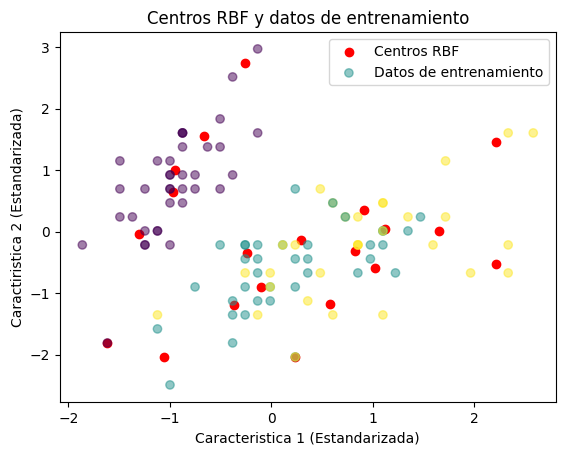

In [10]:
# Visualizar algunos centros (primeras 2 dimensiones)
plt.scatter(rbf_layer.centers[:,0], rbf_layer.centers[:,1], c='red', label='Centros RBF')
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, cmap='viridis', alpha=0.5, label='Datos de entrenamiento')
plt.xlabel('Caracteristica 1 (Estandarizada)')
plt.ylabel('Caractiristica 2 (Estandarizada)')
plt.title('Centros RBF y datos de entrenamiento')
plt.legend()
plt.show()